In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


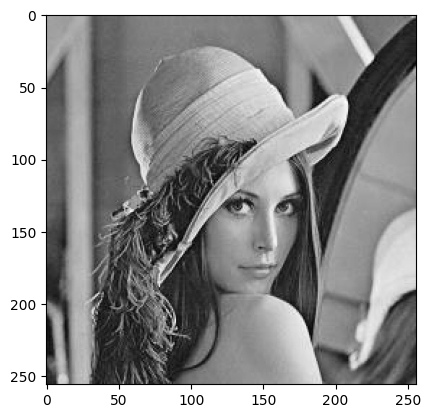

In [3]:
img = cv2.imread('/content/gdrive/My Drive/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

소벨 마스크

In [6]:
gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = int)
gy = np.array([[-1, -2, -1], [0,0,0], [1, 2, 1]], dtype = int)

In [47]:
x = cv2.filter2D(gImg, -1, gx)
y = cv2.filter2D(gImg, -1, gy)

In [51]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

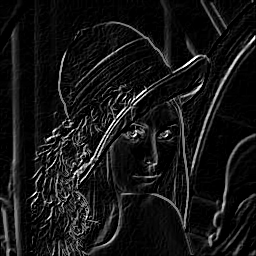

In [26]:
cv2_imshow(outImg)

In [27]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)

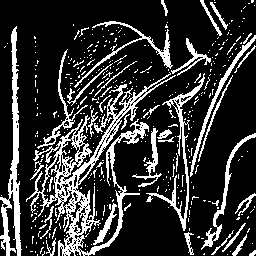

In [28]:
threshold = 30

for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    if(outImg[h,w] > threshold):
      gBin[h,w] = 255

cv2_imshow(gBin)

프르윗 마스크

In [46]:
gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype = int)
gy = np.array([[-1, -1, -1], [0,0,0], [1, 1, 1]], dtype = int)

In [38]:
x = cv2.filter2D(gImg, -1, gx)
y = cv2.filter2D(gImg, -1, gy)

In [39]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

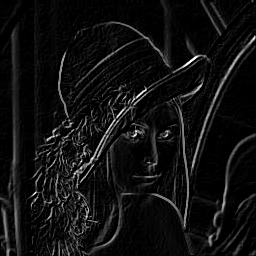

In [40]:
cv2_imshow(outImg)

In [41]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)

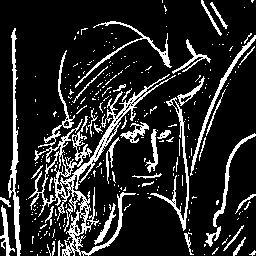

In [42]:
threshold = 30

for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    if(outImg[h,w] > threshold):
      gBin[h,w] = 255

cv2_imshow(gBin)

캐니

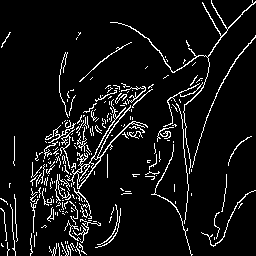

In [44]:
cannyImg = cv2.Canny(gImg, 200, 250)
cv2_imshow(cannyImg)

In [45]:
blurImg = cv2.GaussianBlur(gImg, (5,5), 1.4)

In [54]:
x = cv2.filter2D(blurImg, -1, gx)
y = cv2.filter2D(blurImg, -1, gy)

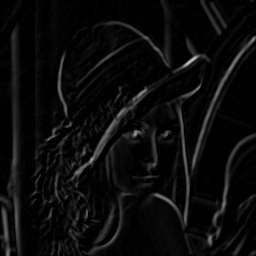

In [56]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
cannyOutImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
cv2_imshow(cannyOutImg)

In [57]:
cannyDirection = np.arctan2(y,x)